In [1]:
import numpy as np
import matplotlib.pyplot as plt


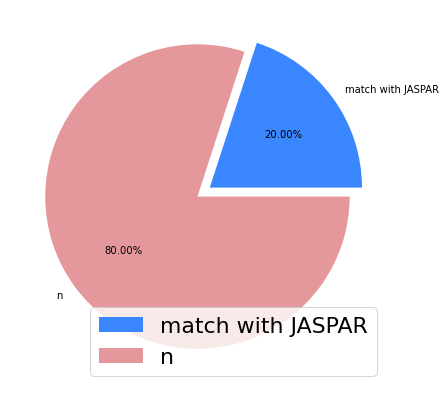

In [2]:

plt.figure(figsize=(7,7))
frac = [6/30, 24/30]
label = ["match with JASPAR", "n"]
explode = [0.1,0]  # 
plt.pie(frac, labels=label, colors=["#3A86FF", "#E5989B"], explode=explode, autopct="%.2f%%")
plt.legend(loc="lower right", prop = {'size':22})
plt.savefig("image/Attention_JASPAR_Sector.svg", bbox_inches='tight')
plt.show()

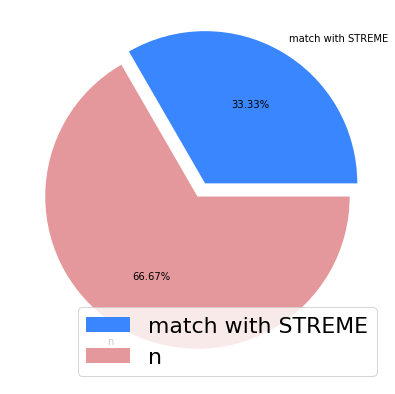

In [3]:

plt.figure(figsize=(7,7))
frac = [10/30, 20/30]
label = ["match with STREME", "n"]
explode = [0.1,0]  # 
plt.pie(frac, labels=label, colors=["#3A86FF", "#E5989B"], explode=explode, autopct="%.2f%%")
plt.legend(loc="lower right", prop = {'size':22})
plt.savefig("image/Attention_STREME_Sector.svg", bbox_inches='tight')
plt.show()

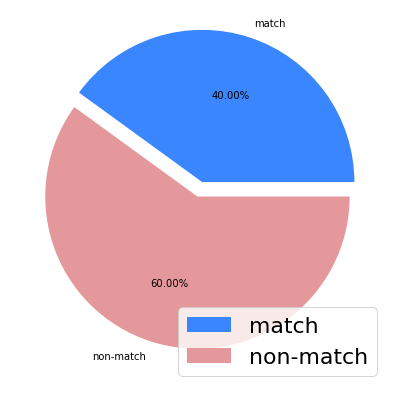

In [4]:

plt.figure(figsize=(7,7))
frac = [12/30, 18/30]
label = ["match", "non-match"]
explode = [0.1,0]  # 
plt.pie(frac, labels=label, colors=["#3A86FF", "#E5989B"], explode=explode, autopct="%.2f%%")
plt.legend(loc="lower right", prop = {'size':22})
plt.savefig("image/Attention_all_Sector.svg", bbox_inches='tight')
plt.show()

In [5]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

atten_scores_filename = "../atten/atten_score_file/atten_scores.npy"
motif_AGGAG_filename = "../atten/atten_score_file/motif_AGGAG.npy"
motif_CAGCA_filename = "../atten/atten_score_file/motif_CAGCA.npy"

atten_scores = np.load(atten_scores_filename)
motif_AGGAG = np.load(motif_AGGAG_filename, allow_pickle=True).item()
motif_CAGCA = np.load(motif_CAGCA_filename, allow_pickle=True).item()

print(motif_AGGAG["seq_idx"])

def get_atten_region(atten_scores, motifs):
    print(motifs["atten_region_pos"])
    motif_vector = []
    for index in range(len(motifs["seq_idx"])):
        seq_id = motifs["seq_idx"][index]
        region = motifs["atten_region_pos"][index]

        seq_score = atten_scores[seq_id]
        seq_score_min = min(seq_score)
        
        region_start = region[0]
        region_end = region[1]
        
        region_start = region_start - 5
        region_end = region_end + 5

        start_supp = []
        end_supp = []
        if region_start < 0:
            supply_num = -region_start
            for i in range(supply_num):
                start_supp.append(seq_score_min)
            region_start = 0
        
        if region_end >= 200:
            supply_num = region_end - 200
            for i in range(supply_num):
                end_supp.append(seq_score_min)
            region_end = 200

        mid_score = seq_score[region_start:region_end]
        region_score = start_supp + mid_score.tolist() + end_supp

        motif_vector.append(region_score)
    return motif_vector

# AGGAG
motif_AGGAG_vector = get_atten_region(atten_scores, motif_AGGAG)
motif_CAGCA_vector = get_atten_region(atten_scores, motif_CAGCA)

[403, 915, 1380, 1399, 761, 985, 1214, 8, 652, 1100, 1106, 1218, 1247, 448, 1044, 1139, 1207]
[(33, 38), (181, 186), (166, 171), (134, 139), (194, 199), (117, 122), (142, 147), (126, 131), (1, 6), (58, 63), (115, 120), (159, 164), (194, 199), (104, 109), (91, 96), (137, 142), (143, 148)]
[(57, 62), (16, 21), (180, 185), (17, 22), (97, 102), (25, 30), (173, 178), (107, 112), (79, 84), (120, 125), (67, 72), (137, 142), (136, 141), (150, 155), (102, 107), (153, 158), (138, 143), (19, 24), (167, 172), (14, 19), (33, 38), (73, 78), (38, 43), (119, 124), (136, 141), (17, 22), (52, 57), (194, 199), (0, 5), (175, 180), (81, 86), (92, 97), (67, 72), (0, 5), (0, 5), (186, 191), (41, 46), (53, 58), (28, 33), (142, 147)]


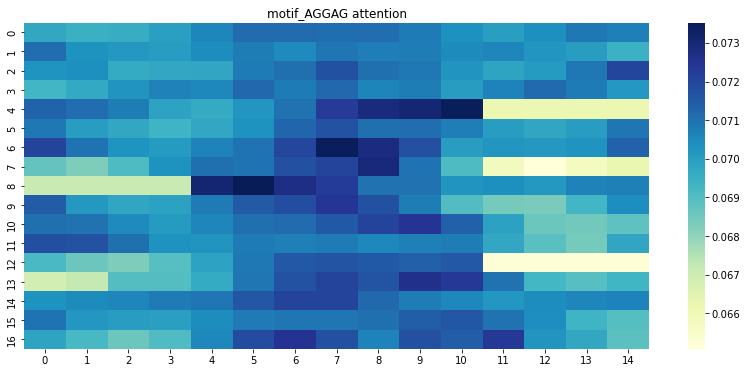

In [6]:
motif_AGGAG_vector = np.array(motif_AGGAG_vector)

plt.figure(figsize=(14, 6))
ax = sns.heatmap(motif_AGGAG_vector, cmap="YlGnBu")
ax.set_title("motif_AGGAG attention")
plt.savefig("image/motif_AGGAG.svg", format="svg", bbox_inches ="tight")
plt.show()

[0.06604655 0.06665737 0.06851787 0.06926848 0.07023177 0.0712373
 0.07073797 0.07055538 0.07187511 0.07328924 0.07605107 0.06397317
 0.06397317 0.06397317 0.06397317]


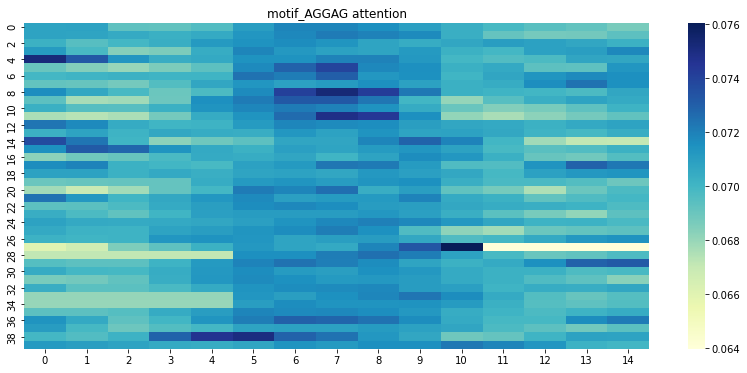

In [7]:
motif_CAGCA_vector = np.array(motif_CAGCA_vector)
print(motif_CAGCA_vector[27])
plt.figure(figsize=(14, 6))
ax = sns.heatmap(motif_CAGCA_vector, cmap="YlGnBu")
ax.set_title("motif_AGGAG attention")
plt.savefig("image/motif_CAGCA.svg", format="svg", bbox_inches ="tight")
plt.show()